In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn opencv-python Pillow


🔹 Step 1: Setup

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("artworks_andy_warhol.csv")

# Keep only rows with available image URLs
df = df[df['has_image'] == True]

# Preview
print(df.shape)
df.head()


(310, 10)


,title,artist,description,purchase_price,sale_price,gross_appreciation_multiplier,gross_appreciation_period,url,has_image,image_url
0,Four jackies,ANDY WARHOL (b. 1928 d. 1987),acrylic and silkscreen,$2.2K,$1.9M,859.1x,16 years,https://www.masterworks.com/research/artist/an...,True,https://static.masterworks.io/resize/800/maste...
1,Lavender marilyn (1),ANDY WARHOL (b. 1928 d. 1987),acrylic and silkscreen ink on canvas,$7.2K,$4.6M,647.5x,25 years,https://www.masterworks.com/research/artist/an...,True,https://static.masterworks.io/resize/800/maste...
2,Self-portrait,ANDY WARHOL (b. 1928 d. 1987),"""diptych--synthetic polymer, metallic paint an...",$31.2K,$5.7M,182.1x,24 years,https://www.masterworks.com/research/artist/an...,True,https://static.masterworks.io/resize/800/maste...
3,Smiling jackie,ANDY WARHOL (b. 1928 d. 1987),synthetic polymer and silkscreen inks on canvas,$8K,$1.2M,144x,31 years,https://www.masterworks.com/research/artist/an...,True,https://static.masterworks.io/resize/800/maste...
4,Flowers,ANDY WARHOL (b. 1928 d. 1987),"""synthetic polymer and silkscreen inks on line...",$46.2K,$4.2M,90.8x,28 years,https://www.masterworks.com/research/artist/an...,True,https://static.masterworks.io/resize/800/maste...


🔹 Step 2: Download and Save Images

In [3]:
import os
import requests
from tqdm import tqdm

os.makedirs("images", exist_ok=True)

# Save top 100 images (or all if you want)
for i, row in tqdm(df.iterrows(), total=100):
    url = row['image_url']
    img_name = f"images/{i}.jpg"
    try:
        img_data = requests.get(url).content
        with open(img_name, 'wb') as handler:
            handler.write(img_data)
    except:
        print(f"Failed to download {url}")
    if i >= 99:
        break


 97%|█████████▋| 97/100 [01:34<00:02,  1.02it/s]


🔹 Step 3: Image Preprocessing + CNN Feature Extraction
                                                                                

In [4]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

# Load model
cnn_model = EfficientNetB0(weights="imagenet", include_top=False, pooling="avg")

def extract_image_features(img_path):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features = cnn_model.predict(x)
        return features.flatten()
    except:
        return np.zeros(1280)  # default feature vector size

# Apply to all images
image_features = []
for i in range(100):
    img_path = f"images/{i}.jpg"
    features = extract_image_features(img_path)
    image_features.append(features)

image_features = np.array(image_features)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━


🔹 Step 4: Combine with Tabular Features

In [8]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- Step 1: Convert prices (K, M, $) ---
def convert_to_float(value):
    value = str(value).replace('$', '').strip()
    if 'M' in value:
        return float(value.replace('M', '')) * 1_000_000
    elif 'K' in value:
        return float(value.replace('K', '')) * 1_000
    else:
        return float(value)

df['purchase_price'] = df['purchase_price'].apply(convert_to_float)
df['sale_price'] = df['sale_price'].apply(convert_to_float)

# --- Step 2: Clean gross_appreciation_multiplier ---
df['gross_appreciation_multiplier'] = df['gross_appreciation_multiplier'].replace('x', '', regex=True).astype(float)

# --- ✅ Step 3: Handle 'gross_appreciation_period' properly ---
df['gross_appreciation_period'] = df['gross_appreciation_period'].replace('less than a year', '0.5')
df['gross_appreciation_period'] = df['gross_appreciation_period'].replace(' years', '', regex=True).astype(float)

# --- Step 4: Drop rows with any missing values ---
df.dropna(subset=['purchase_price', 'sale_price', 'gross_appreciation_multiplier', 'gross_appreciation_period'], inplace=True)

# --- Step 5: Prepare tabular features (first 100 samples) ---
tabular_features = df[['purchase_price', 'gross_appreciation_multiplier', 'gross_appreciation_period']][:100]

# Scale
scaler = StandardScaler()
tabular_scaled = scaler.fit_transform(tabular_features)

# --- Step 6: Combine image + tabular ---
X = np.hstack((tabular_scaled, image_features[:100]))
y = df['sale_price'][:100].values



 🔹 Step5 : Model Training + Evaluation



In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import numpy as np

# --- Train Random Forest Regressor ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# --- Predict on the same data (for now) ---
y_pred = model.predict(X)

# --- Evaluate the model ---
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))  # Manually compute RMSE

print(f"✅ Mean Absolute Error (MAE): {mae:,.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:,.2f}")

# --- Save the trained model ---
joblib.dump(model, 'art_price_multimodal_model.pkl')
print("📦 Model saved as: art_price_multimodal_model.pkl")



✅ Mean Absolute Error (MAE): 916,840.76
✅ Root Mean Squared Error (RMSE): 2,565,270.40
📦 Model saved as: art_price_multimodal_model.pkl


✅ Step 6:  Visualize Predictions vs Actual



This will help you see how well the model is performing.

📊 Code to Visualize Predictions vs Actual Sale Price:

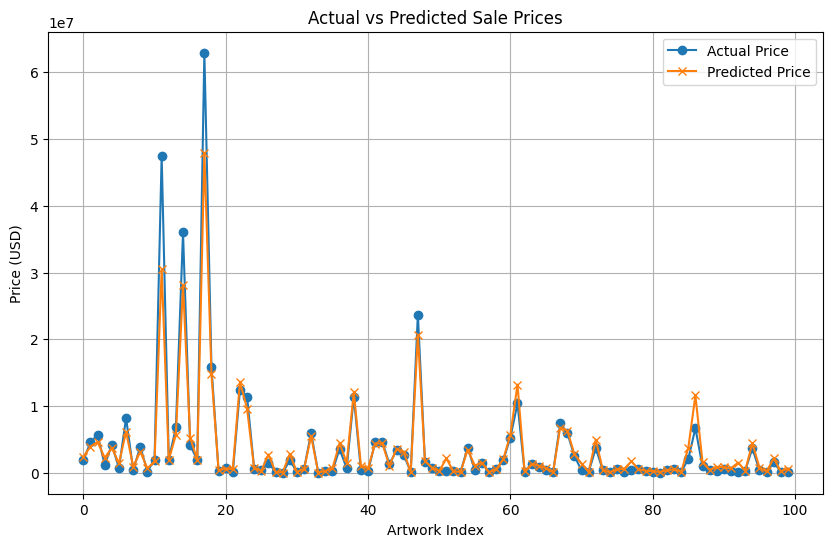

In [11]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Sale Prices
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual Price', marker='o')
plt.plot(y_pred, label='Predicted Price', marker='x')
plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Artwork Index')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
